# This notebook further investigates the domains that were found in the pdb files in Notebook 9.1

In [1]:
import pandas as pd
import sys
import re
import yaml
import os
import regex
import shutil
import multiprocessing as mp
from biopandas.pdb import PandasPdb
from biopandas.pdb.engines import *
from pyRBDome.Classes.PeptideAnalyser import *
from pyRBDome.Functions.RBDomeAnalysisCode import *
from pyRBDome.Classes.DataFileParser import *
from pyRBDome.Functions.RBDomeSQL import *
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict
from pathlib import Path
import Bio
from Bio import SeqIO
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = ['Arial']
matplotlib.rcParams['lines.linewidth'] = 0.75
matplotlib.rcParams['axes.linewidth'] = 0.75
matplotlib.rc('ytick',labelsize=12)
matplotlib.rc('xtick',labelsize=14)
matplotlib.rc('axes',labelsize=18)
%matplotlib inline

### Setting the parameters for the analyses:

In [2]:
settings_file = open('settings.yaml','r')
settings = yaml.load(settings_file,Loader=yaml.FullLoader)

In [5]:
### General parameters:
no_cpus = settings[0]['general']['no_cpus']
pdb_dir = os.path.abspath(settings[0]['general']['pdb_dir'])
out_dir = os.path.abspath(settings[0]['general']['out_dir'])
datafile = os.path.abspath(settings[0]['general']['datafile'])

### Database parameters: 
database_name = settings[4]['database']['database_name']
database_table = settings[4]['database']['database_table']
processed_table = settings[4]['database']['processed_files_log']

### Import InterProScan annotated domain sequences

In [6]:
listTablesFromSQLite(database_name)

['available_pdbs',
 'pyrbdome_analysis',
 'processed_files_log',
 'InterProScan_Pfam_data',
 'interpro_results',
 'All_combined_results']

In [7]:
domain_seq = loadTableFromSQLite('InterProScan_Pfam_data',database_name)

Table 'InterProScan_Pfam_data' successfully loaded from database 'pyrbdome_full.db' 


In [8]:
domain_seq.head()

Start  Stop Protein_accession Signature_accession      CL         Domain  \
0      6    80   A0A1Q8DC10_AF_A             PF01883  CL0232           NifU   
1    112   348   A0A1Q8DDC1_AF_A             PF10609  CL0023  P-loop_NTPase   
2      1   173   A0A1Q8DF53_AF_A             PF03602  CL0063  NADP_Rossmann   
3    190   300   A0A1Q8DGR9_AF_A             PF00472  CL0337             RF   
4      2   180   A0A1Q8DGR9_AF_A             PF03462    None           None   

               Id                           Description  \
0  FeS_assembly_P  Iron-sulfur cluster assembly protein   
1            ParA     NUBPL iron-transfer P-loop NTPase   
2   Cons_hypoth95     Conserved hypothetical protein 95   
3            RF-1                           RF-1 domain   
4            PCRF                           PCRF domain   

                                     Domain_sequence  
0  DSILGALEMVIDPELGIDIVNLGLVYKVNVDDDGLCTVEMTLTSMG...  
1  IAIASGKGGVGKSTVAVNLAVALAREGKRVGLVDADIYGFSVPDMM...  
2  RVIAGKHKSKALESLEGRNTRPTMDKVKEGIFNSLQDVHGLGLDLF...  
3  EIEIEINPDDITVDTFRASGAGGQHINKTESAIRITHHPTGIVVNN...  
4  TEPDFWDDQNKAQDIIDKNNALKSVVNGYHELDEEVEDMTATWELL...

### 1. The first step is to use the information in this table to cound the occurrence of each domain in the data, using the 'Id' column in the table:

In [9]:
domain_counts = domain_seq['Id'].value_counts()
top_domain_counts = domain_counts[:20]

In [ ]:
top_domain_counts

MMR_HSR1           6
DNA_gyraseA_C      5
S4                 4
ABC_tran           4
Helicase_C         4
Toprim             3
Anticodon_1        3
Radical_SAM        3
PseudoU_synth_2    3
S1                 3
Glycos_transf_1    3
DEAD               3
PHP                3
DNA_pol3_alpha     3
tRNA_anti-codon    2
FemAB              2
DNA_pol3_finger    2
HHH_6              2
TetR_N             2
RNA_pol_Rpb2_2     2
Name: Id, dtype: int64

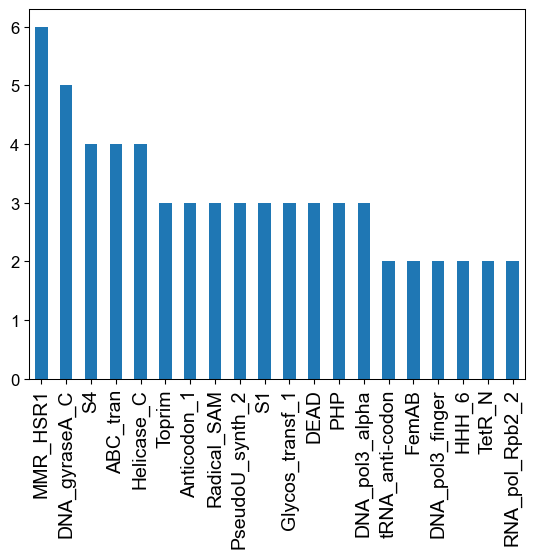

In [ ]:
fig,ax = plt.subplots()
top_domain_counts.plot.bar(x=top_domain_counts.values,
                           y=top_domain_counts.index,
                           rot=90,
                           ax=ax)
plt.savefig("%s/Top_domains_barplot.pdf" % out_dir,dpi=400)

# DONE!